<a href="https://colab.research.google.com/github/shivangipokhriyal/TestRepo/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import pandas as pd

# visualisation libraries
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
from folium import plugins

# manipulating  default plot size
plt.rcParams['figure.figsize']=10, 12

# Disable warnimgs
import warnings
warnings.filterwarnings('ignore')

In [62]:
from datetime import datetime
import os
import re
import glob
import requests
from bs4 import BeautifulSoup

In [63]:
link = 'https://www.mohfw.gov.in/'
req = requests.get(link)
# parse web data
soup= BeautifulSoup(req.content, "html.parser")

In [64]:
# out target table is the last table in the page

# get table head which may contain column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# get all the rows in table head
head = thead.find_all('tr')
# print(head)

# get table body
tbody= soup.find_all('tbody')[-1]
# get all thge rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [65]:
# get table contents
head_rows= []
body_rows=[]
# loop through head and appemd each row to head
for tr in head:
  td = tr.find_all(['th', 'td'])
  row= [i.text for i in td]
  head_rows.append(row)
  #print(head_rows)

# loop through head and appemd each row to body
for tr in body:
  td = tr.find_all(['th', 'td'])
  row= [i.text for i in td]
  body_rows.append(row)
  # print(body_rows)  


In [66]:
# save contents in data frame
df_bs = pd.DataFrame(body_rows[: len(body_rows)-6], 
                      columns=head_rows[0])
df_bs.drop('S. No.', axis=1, inplace= True)
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,10,40,0,50
1,Andhra Pradesh,5284,4599,119,10002
2,Arunachal Pradesh,126,22,0,148
3,Assam,2060,3762,9,5831
4,Bihar,1993,6104,56,8153
5,Chandigarh,90,322,6,418
6,Chhattisgarh,797,1553,12,2362
7,Dadra and Nagar Haveli and Daman and Diu,91,29,0,120
8,Delhi,24988,39313,2301,66602
9,Goa,703,205,1,909


In [67]:
df_India = df_bs.copy()

now= datetime.now()
# date format
df_India['Date']=  now.strftime("%m/%d/%Y")
# add date column to data frame
df_India['Date'] =  pd.to_datetime(df_India['Date'], format='%m/%d/%Y')
#df_India.head(36)


In [68]:
# remove extra characters from name of state/ut column
df_India['Name of State / UT']= df_India['Name of State / UT'].str.replace('#','')
df_India['Deaths**']=df_India['Deaths**'].str.replace("#",'')


In [69]:
#latitude of states
lat = { 'Delhi':28.7041,'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan' :27.0238,
       'Telengana':18.1124, 'Uttar Pradesh' :26.8467, 'Ladakh':34.2996, 'Tamil Nadu' :11.1271, 
       'Jammu and Kashmir': 33.7782 ,'Punjab' :31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515, 
       'Andhra Pradesh':15.9129,'Odisha' :20.9517, 'Uttarakhand':30.0668,  'West Bengal':22.9868, 
       'Puducherry' : 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa':15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand' : 23.6102,'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim': 27.5330} 
#longitude
long = { 'Delhi':77.1025,'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan' :74.2179,
       'Telengana':79.0193, 'Uttar Pradesh' :80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab' :75.3412, 'Karnataka':75.7139, 'Maharashtra' :75.7139, 
        'Andhra Pradesh':79.7400, 'Odisha' :85.0985, 'Uttarakhand' :79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh' : 81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur' :93.9063, 
        'Mizoram':92.9376, 'Goa': 741240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624, 
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim': 88.5122}

df_India['Latitude'] = df_India['Name of State / UT'].map(lat)
df_India['Longitude']= df_India['Name of State / UT'].map(long)
df_India.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,10,40,0,50,2020-06-24,11.7401,92.6586
1,Andhra Pradesh,5284,4599,119,10002,2020-06-24,15.9129,79.7400
2,Arunachal Pradesh,126,22,0,148,2020-06-24,28.2180,94.7278
3,Assam,2060,3762,9,5831,2020-06-24,26.2006,92.9376
4,Bihar,1993,6104,56,8153,2020-06-24,25.0961,85.3131
5,Chandigarh,90,322,6,418,2020-06-24,30.7333,76.7794
6,Chhattisgarh,797,1553,12,2362,2020-06-24,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,91,29,0,120,2020-06-24,NaN,NaN
8,Delhi,24988,39313,2301,66602,2020-06-24,28.7041,77.1025
9,Goa,703,205,1,909,2020-06-24,15.2993,741240.0000


In [70]:
# rename columns
df_India = df_India.rename( columns={ 'Cured/Discharged/Migrated*':'Cured',
                                        'Total Confirmed cases *':'Confirmed',
                                         'Total Confirmed cases ':'Confirmed',
                                        'Total Confirmed cases*':'Confirmed'})
df_India=df_India.rename(columns={'Cured/Discharged':'Cured'})
df_India= df_India.rename(columns={'Name of State / UT': 'State/UnionTerritory'})
df_India= df_India.rename(columns=lambda x:re.sub('Total Confirmed cases \(Including .* foreign Nationals\)','Total Confirmed cases', x))
df_India = df_India.rename( columns= {'Deaths (more that 70% cases due to comorbidities )' : 'Deaths', 'Deaths**':'Deaths'})
df_India.head(1)

,State/UnionTerritory,Active Cases*,Cured,Deaths,Confirmed,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,10,40,0,50,2020-06-24,11.7401,92.6586


In [71]:
#unique state names
df_India['State/UnionTerritory'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [72]:
#number of missing values
df_India.isna().sum()

State/UnionTerritory    0
Active Cases*           0
Cured                   0
Deaths                  0
Confirmed               0
Date                    0
Latitude                2
Longitude               2
dtype: int64

In [73]:
# number of unique values
df_India.nunique()

State/UnionTerritory    35
Active Cases*           35
Cured                   34
Deaths                  25
Confirmed               35
Date                     1
Latitude                33
Longitude               30
dtype: int64

In [74]:
#saving data

# file names as y-m-d.csv format
file_name = now.strftime("%Y_%m_%d")+' -COVID-19_India.csv'
#location for saving file
file_loc= '/content/'
# save file as csv file
df_India.to_csv(file_loc + file_name, index= False)

#df_India.head(36)


In [75]:
# fix datatype
df_India['Date']= pd.to_datetime(df_India['Date'])


In [76]:
# rename state/Ut names
df_India['State/UnionTerritory'].replace('Chattisgarh','Chhattisgarh', inplace=True)
df_India['State/UnionTerritory'].replace('Pondicherry','Puducherry', inplace=True)


In [77]:
df_India.head(36)

,State/UnionTerritory,Active Cases*,Cured,Deaths,Confirmed,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,10,40,0,50,2020-06-24,11.7401,92.6586
1,Andhra Pradesh,5284,4599,119,10002,2020-06-24,15.9129,79.7400
2,Arunachal Pradesh,126,22,0,148,2020-06-24,28.2180,94.7278
3,Assam,2060,3762,9,5831,2020-06-24,26.2006,92.9376
4,Bihar,1993,6104,56,8153,2020-06-24,25.0961,85.3131
5,Chandigarh,90,322,6,418,2020-06-24,30.7333,76.7794
6,Chhattisgarh,797,1553,12,2362,2020-06-24,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,91,29,0,120,2020-06-24,NaN,NaN
8,Delhi,24988,39313,2301,66602,2020-06-24,28.7041,77.1025
9,Goa,703,205,1,909,2020-06-24,15.2993,741240.0000


In [78]:
# to get info
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   State/UnionTerritory  35 non-null     object        
 1   Active Cases*         35 non-null     object        
 2   Cured                 35 non-null     object        
 3   Deaths                35 non-null     object        
 4   Confirmed             35 non-null     object        
 5   Date                  35 non-null     datetime64[ns]
 6   Latitude              33 non-null     float64       
 7   Longitude             33 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 2.3+ KB


In [79]:
#save as .csv file

# file names as y-m-d.csv format
file_name = now.strftime("%Y_%m_%d")+' -COVID-19_India_preprocessed.csv'
#location for saving file
file_loc= '/content/'
# save file as csv file
df_India.to_csv(file_loc + file_name, index= False)

#df_India.head(36)

In [80]:
# learn to create .csv file by creating a dataframe using pandas
#reading the datasets
df= pd.read_csv('/content/2020_06_24 -COVID-19_India_preprocessed.csv')
df_india=df.copy()
df

,State/UnionTerritory,Active Cases*,Cured,Deaths,Confirmed,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,10,40,0,50,2020-06-24,11.7401,92.6586
1,Andhra Pradesh,5284,4599,119,10002,2020-06-24,15.9129,79.7400
2,Arunachal Pradesh,126,22,0,148,2020-06-24,28.2180,94.7278
3,Assam,2060,3762,9,5831,2020-06-24,26.2006,92.9376
4,Bihar,1993,6104,56,8153,2020-06-24,25.0961,85.3131
5,Chandigarh,90,322,6,418,2020-06-24,30.7333,76.7794
6,Chhattisgarh,797,1553,12,2362,2020-06-24,21.2787,81.8661
7,Dadra and Nagar Haveli and Daman and Diu,91,29,0,120,2020-06-24,NaN,NaN
8,Delhi,24988,39313,2301,66602,2020-06-24,28.7041,77.1025
9,Goa,703,205,1,909,2020-06-24,15.2993,741240.0000


In [81]:
# ANALYSING THE DATA

In [82]:
total_cases = df['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date:',total_cases)

Total number of confirmed COVID 2019 cases across India till date: 448042


In [83]:
# how to highlight your dataframe
df_temp = df.drop(['Latitude','Longitude','Date','Active Cases*'], axis = 1)
# above code removes date latitude and  longitude and other extra columns
df_temp.style.background_gradient(cmap='Reds')

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,40,0,50
1,Andhra Pradesh,4599,119,10002
2,Arunachal Pradesh,22,0,148
3,Assam,3762,9,5831
4,Bihar,6104,56,8153
5,Chandigarh,322,6,418
6,Chhattisgarh,1553,12,2362
7,Dadra and Nagar Haveli and Daman and Diu,29,0,120
8,Delhi,39313,2301,66602
9,Goa,205,1,909


In [84]:
today= now.strftime("%Y_%m_%d")
total_cured= df['Cured'].sum()
print("Total people who have been cured as of "+today+" are: ", total_cured)
total_cases= df['Confirmed'].sum()
print("Total number of people who were detected COVID +ve as of "+today+" are: ", total_cases)
total_death = df['Deaths'].sum()
print("Total people who died due to COVID19 as of "+today+" are: ",total_death)
total_active = total_cases - total_cured - total_death
print("Total active cases as of "+today+" are: ",total_active)

Total people who have been cured as of 2020_06_24 are:  258685
Total number of people who were detected COVID +ve as of 2020_06_24 are:  448042
Total people who died due to COVID19 as of 2020_06_24 are:  14476
Total active cases as of 2020_06_24 are:  174881


In [85]:
# toatl active cases= no. of death + cured
df['Total Active']= df['Confirmed']- (df['Deaths']+ df['Cured'])
total_active= df['Total Active'].sum()
print('Total number of active COVID 19 cases across /india are: ', total_active)
Tot_Cases = df.groupby('State/UnionTerritory')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')


Total number of active COVID 19 cases across /india are:  174881


,Total Active
State/UnionTerritory,
Maharashtra,62848
Tamil Nadu,28431
Delhi,24988
Uttar Pradesh,6189
Gujarat,6148
Andhra Pradesh,5284
Telangana,5109
West Bengal,4930
Haryana,4844


In [86]:
import numpy as np
state_cases= df_india.groupby('State/UnionTerritory')['Confirmed','Deaths', 'Cured'].max().reset_index()

#state_cases = state_cases.astype({'Deaths':'int'})
state_cases['Active']= state_cases['Confirmed']- (state_cases['Deaths']+state_cases['Cured'])
state_cases['Death Rate (per 100)']= np.round(100*state_cases["Deaths"]/state_cases['Confirmed'],2)
state_cases['Cure Rate (per 100)']= np.round(100*state_cases["Cured"]/state_cases['Confirmed'],2)
state_cases.sort_values('Confirmed', ascending=False).fillna(0).style.background_gradient(cmap='Pastel1', subset=['Confirmed'])\
                         .background_gradient(cmap='Blues', subset=["Deaths"])\
                         .background_gradient(cmap='Greens', subset=["Cured"])\
                         .background_gradient(cmap='Blues', subset=["Active"])\
                         .background_gradient(cmap='Oranges', subset=["Death Rate (per 100)"])\
                         .background_gradient(cmap='BrBG', subset=["Cure Rate (per 100)"])


,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
19,Maharashtra,139010,6531,69631,62848,4.700000,50.090000
8,Delhi,66602,2301,39313,24988,3.450000,59.030000
29,Tamil Nadu,64603,833,35339,28431,1.290000,54.700000
10,Gujarat,28371,1710,20513,6148,6.030000,72.300000
32,Uttar Pradesh,18893,588,12116,6189,3.110000,64.130000
27,Rajasthan,15627,365,12213,3049,2.340000,78.150000
34,West Bengal,14728,580,9218,4930,3.940000,62.590000
18,Madhya Pradesh,12261,525,9335,2401,4.280000,76.140000
11,Haryana,11520,178,6498,4844,1.550000,56.410000
1,Andhra Pradesh,10002,119,4599,5284,1.190000,45.980000


In [87]:
df['Confirmed'].sum()

448042

In [88]:
## age_details = pd.read_csv('/content/AgeGroupDetails.csv')
india_covid_19 = pd.read_csv('/content/covid_19_india.csv')
hospital_beds = pd.read_csv('/content/HospitalBedsIndia.csv')
individual_details = pd.read_csv('/content/IndividualDetails.csv')
ICMR_details = pd.read_csv('/content/ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('/content/ICMRTestingLabs.csv')
state_testing = pd.read_csv('/content/StatewiseTestingDetails.csv')
population = pd.read_csv('/content/population_india_census2011.csv')


In [116]:
india_covid_19['Date'] = pd.to_datetime(india_covid_19['Date'], dayfirst = True)
state_testing['Date'] = pd.to_datetime(state_testing['Date'])
ICMR_details['DateTime'] = pd.to_datetime(ICMR_details['DateTime'], dayfirst=True)
ICMR_details = ICMR_details.dropna(subset=['TotalSamplesTested', 'TotalPositiveCases'])

,SNo,DateTime,TotalSamplesTested,TotalIndividualsTested,TotalPositiveCases,Percent Positive
0,1,2020-03-13 18:00:00,6500.0,5900.0,78.0,1.2
1,2,2020-03-18 18:00:00,13125.0,12235.0,150.0,1.1
2,3,2020-03-19 18:00:00,14175.0,13285.0,182.0,1.3
3,4,2020-03-20 18:00:00,15404.0,14514.0,236.0,1.5
4,5,2020-03-21 18:00:00,16911.0,16021.0,315.0,1.9
5,6,2020-03-22 18:00:00,18127.0,17237.0,396.0,2.2
6,7,2020-03-23 20:00:00,20707.0,19817.0,471.0,2.3
7,8,2020-03-24 20:00:00,22694.0,21804.0,536.0,2.4
8,9,2020-03-25 20:00:00,25144.0,24254.0,581.0,2.3
10,11,2020-03-27 09:00:00,27688.0,NaN,691.0,2.5


In [90]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/JamesHizon/COVID-19-Worldwide-Data-Analysis-and-Time-Series-Prediction/master/time_series_covid_19_confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/JamesHizon/COVID-19-Worldwide-Data-Analysis-and-Time-Series-Prediction/master/time_series_covid_19_deaths.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/JamesHizon/COVID-19-Worldwide-Data-Analysis-and-Time-Series-Prediction/master/time_series_covid_19_recovered.csv')
complete_df = pd.read_csv('https://raw.githubusercontent.com/JamesHizon/COVID-19-Worldwide-Data-Analysis-and-Time-Series-Prediction/master/time-series-19-covid-combined.csv')

In [94]:
dates = list(confirmed_df.columns[4:])
dates = list(pd.to_datetime(dates))
dates_india = dates[8:]


In [102]:
tes = list(pd.to_datetime(dates))
dates_india = dates[8:]
df1 = confirmed_df.groupby('Country/Region').sum().reset_index()
df2 = deaths_df.groupby('Country/Region').sum().reset_index()
df3 = recovered_df.groupby('Country/Region').sum().reset_index()



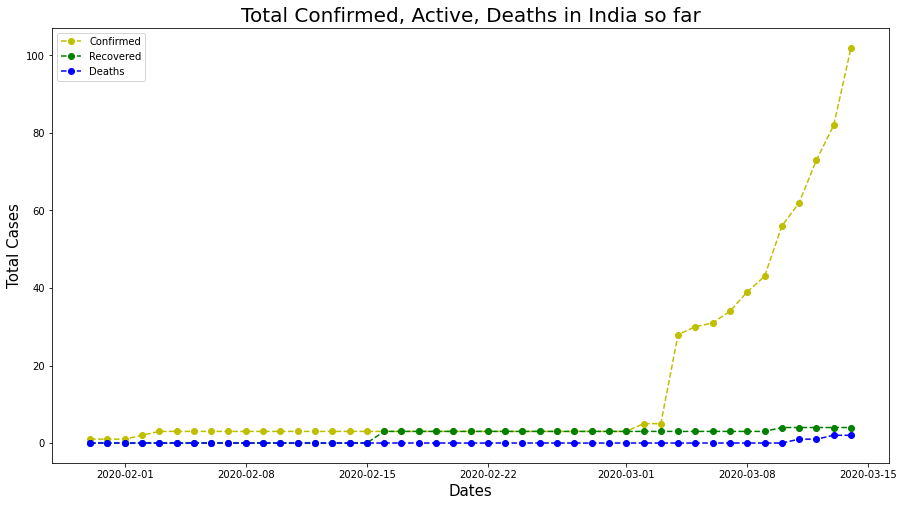

In [113]:
k = df1[df1['Country/Region'] == 'India'].loc[: , '1/30/20':]
india_confirmed = k.values.tolist()[0]

k = df2[df2['Country/Region'] == 'India'].loc[: , '1/30/20':]
india_deaths = k.values.tolist()[0]

k = df3[df3['Country/Region'] == 'India'].loc[: , '1/30/20':]
india_recovered = k.values.tolist()[0]

plt.figure(figsize = (15,8))
plt.xticks( fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Dates", fontsize = 15)
plt.ylabel("Total Cases", fontsize = 15)
plt.title("Total Confirmed, Active, Deaths in India so far", fontsize=20)

ax1 = plt.plot_date(y=india_confirmed, x= dates_india, label='Confirmed' , linestyle= 'dashed', color = 'y')
ax2 = plt.plot_date(y=india_recovered, x= dates_india, label='Recovered' , linestyle= 'dashed', color = 'g')
ax3 = plt.plot_date(y=india_deaths, x= dates_india, label='Deaths' , linestyle= 'dashed', color = 'b')
plt.legend()

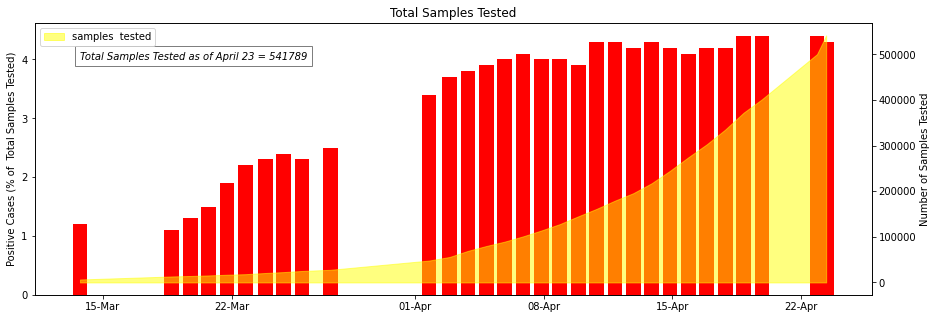

In [122]:
import matplotlib.dates as mdates
ICMR_details['Percent_positive'] = round((ICMR_details['TotalPositiveCases']/ICMR_details['TotalSamplesTested'])*100,1)

fig, ax1 = plt.subplots(figsize = (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax1.set_ylabel('Positive Cases (% of  Total Samples Tested)')
ax1.bar(ICMR_details['DateTime'], ICMR_details['Percent_positive'], color= "red", label = 'Percentage of positive cases')
ax1.text(ICMR_details['DateTime'][0],4, 'Total Samples Tested as of April 23 = 541789',style='italic', fontsize=10,
         bbox={'facecolor':  'white' , 'alpha': 0.5, 'pad':5})

ax2 = ax1.twinx()
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
ax2.set_ylabel('Number of Samples Tested')
ax2.fill_between(ICMR_details['DateTime'], ICMR_details['TotalSamplesTested'],  color='yellow',  alpha=0.5, label='samples  tested')

plt.legend(loc='upper left')
plt.title('Total Samples Tested')
plt.show()


In [123]:
## TESTING LIVE COVID 19 STATUS

# import entire json  library
import json
#get response from webpage
response = requests.get('https://api.covid19india.org/state_test_data.json')

#get contents from the response
content = response.content

#parse the json file
parsed = json.loads(content)

#keys
parsed.keys()

dict_keys(['states_tested_data'])

In [124]:
#save data in a dataframe
tested = pd.DataFrame(parsed['states_tested_data'])

#first few rows
tested.tail()

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,peopleinicu,peopleonventilators,populationncp2019projection,positive,source1,source2,state,tagpeopleinquarantine,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totaln95masks,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totalppe,totaltested,unconfirmed,updatedon,_d5fpr
2399,,,,,948,,395,,,96906000,13531,https://www.wbhealth.gov.in/uploaded_files/cor...,https://t.me/indiacovid/7815,West Bengal,Government,Tested,3.46%,4034,29,4.03,863040,9123,89421,1501262,390942,,20/06/2020,NaN
2400,,,,,948,,395,,,96906000,13945,https://www.wbhealth.gov.in/uploaded_files/cor...,,West Bengal,Government,Tested,3.47%,4143,29,4.14,883040,8897,90350,1521262,401491,,21/06/2020,NaN
2401,,,,,948,,395,,,96906000,14358,https://www.wbhealth.gov.in/uploaded_files/cor...,,West Bengal,,Tested,3.49%,4240,29,4.24,,,,,410854,,22/06/2020,NaN
2402,,,,,948,,395,,,96906000,14728,https://www.wbhealth.gov.in/uploaded_files/cor...,,West Bengal,Government,Tested,3.50%,4337,29,4.34,913040,8819,91469,1546262,420277,,23/06/2020,NaN
2403,,,,,948,,395,,,96906000,15173,https://www.wbhealth.gov.in/uploaded_files/cor...,,West Bengal,Government,Tested,3.53%,4435,28,4.43,931040,8585,92189,1558262,429766,,24/06/2020,NaN


In [127]:
#fix  datatype available
tested['updatedon'] = pd.to_datetime(tested['updatedon'])

In [128]:
#save file as a csv file
tested.to_csv('updated_tests_latest_state_level.csv', index=False)

In [129]:
state_tested_cases = tested.groupby(['updatedon','state'])['totaltested','populationncp2019projection','testsperthousand', 'testsperpositivecase','totalpeoplecurrentlyinquarantine','totalpeoplereleasedfromquarantine']

In [130]:
state_tested_cases.head(36)

,totaltested,populationncp2019projection,testsperthousand,testsperpositivecase,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine
0,1403,397000,3.53,117,,
1,2679,397000,6.75,99,614,347
2,2848,397000,7.17,86,724,420
3,3754,397000,9.46,114,643,556
4,6677,397000,16.82,202,16,1196
...,...,...,...,...,...,...
2399,390942,96906000,4.03,29,9123,89421
2400,401491,96906000,4.14,29,8897,90350
2401,410854,96906000,4.24,29,,
2402,420277,96906000,4.34,29,8819,91469
